# **Practice 1**

# Directory mount

In [ ]:
# Run this codeblock to mount your Google Drive in Google Colab.
from google.colab import drive
drive.mount('/content/drive/')

In [1]:
from pathlib import Path

ROOT = './' # TODO: set your root directory here
# ROOT = '/content/drive/MyDrive/실습1' # example for Google Drive

ROOT = Path(ROOT)
# Check if the root directory exists
if not ROOT.exists():
    print(f"Root directory {ROOT} does not exist. Please check the path.")

# Basic image processing


## Load the Dependencies

This section loads some required libraries used in this notebook: **numpy**, **cv2**, **matplotlib**, **skimage**



*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and etc.

*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.

*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface 
toolkit.


*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.









In [2]:
import numpy as np
import cv2
import matplotlib.pylab as plt
from skimage.transform import downscale_local_mean

## Read image from .jpg file
In this step we will read images from jpg file, and display them

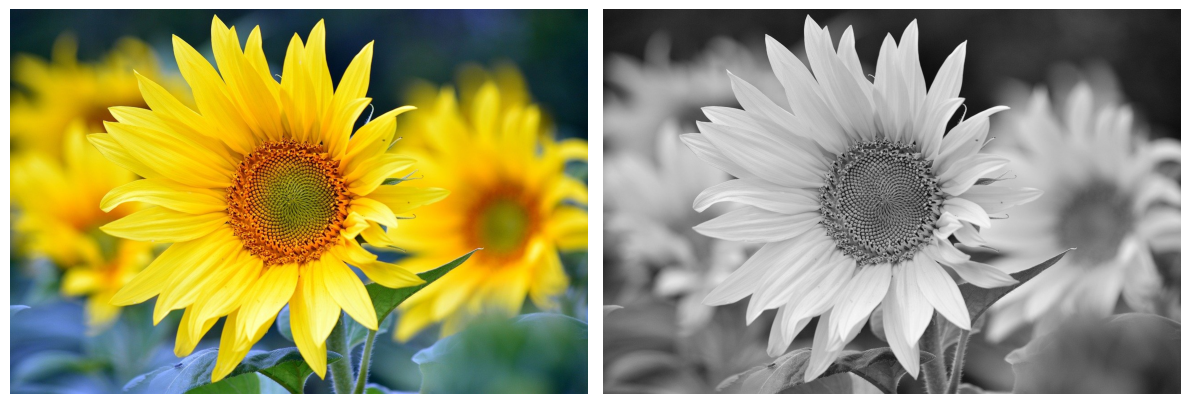

In [ ]:
# Read an image in color
img_color_cv = cv2.imread(ROOT / "sunflower.jpg")
img_color_cv = # TODO: Convert BGR to RGB
img_color = np.array(img_color_cv)

# Read an image in grayscale
img_gray_cv = cv2.imread(ROOT / "sunflower.jpg", 0) # Read as grayscale
img_gray = np.array(img_gray_cv)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_color)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

We can check the shape of the image

In [4]:
print(f"RGB image: {img_color.shape}")
print(f"Grayscale image: {img_gray.shape}")

RGB image: (853, 1280, 3)
Grayscale image: (853, 1280)


## Crop image

We can crop the image by using slicing

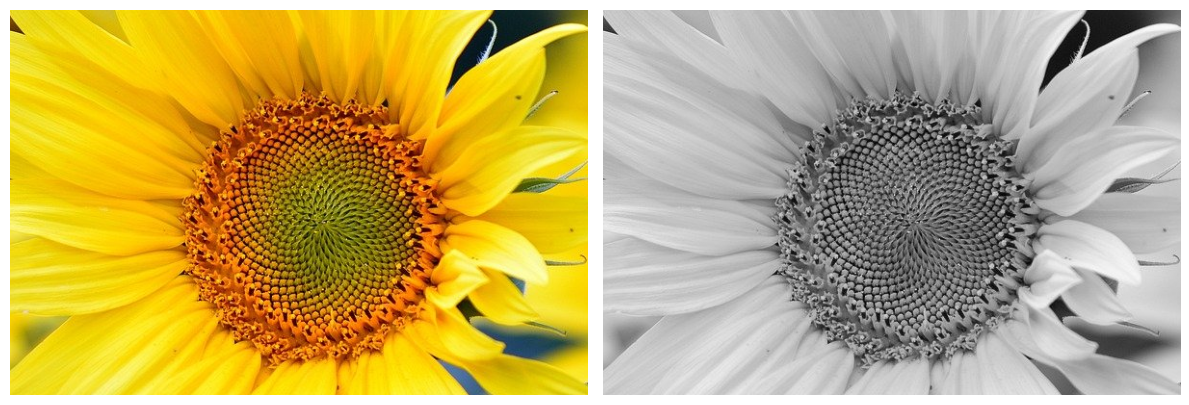

In [ ]:
crop_start = (200, 300)  # Starting point for cropping
crop_size = (400, 600) # Size of the crop

# TODO: Crop the images
img_color_crop = 
img_gray_crop = 

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_color_crop)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gray_crop, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

## Exercises

**Exercise 1.** Load cat (`cat.jpg`) image (both color and grayscale image)

**Exercise 2.** Crop the grayscale cat image


In [ ]:
# TODO: load cat image and plot it


# TODO: load grayscale cat image and plot it


crop_start = (200, 300)
crop_size = (400, 600)
# TODO: crop the grayscale cat image and plot it


## Sampling
Image sampling converts a continuous image to digital by selecting pixels. 

Each pixel represents a sample, and the sampling rate determines detail.

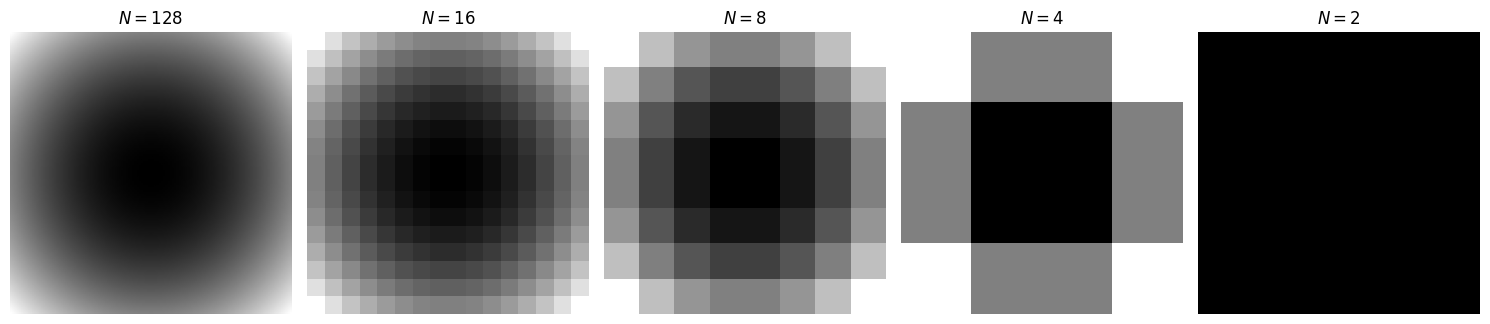

In [6]:
def circle_image(x, y):
    X, Y = np.meshgrid(
        x, y
    )  # create coordinate matrices from given vectors. It's used for creating 2D grid coordinates for plotting.
    return X**2 + Y**2

factors = np.array([128, 16, 8, 4, 2])

fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))  # Make plot space

for i, N in enumerate(factors):
    image = circle_image(
        np.linspace(-1, 1, num=N), np.linspace(-1, 1, num=N)
    )  # 128x128, 16x16, 8x8, 4x4, 2x2
    ax[i].imshow(image, cmap="gray")  # ax[i] = i th image in plot
    ax[i].set_title(f"$N = {N}$")
    ax[i].axis("off")  # Hide axes
plt.tight_layout()
plt.show()

A useful method for downsampling a given image is to use [`downscale_local_mean`](https://scikit-image.org/docs/0.25.x/api/skimage.transform.html#skimage.transform.downscale_local_mean) function in `skimage.transform`.

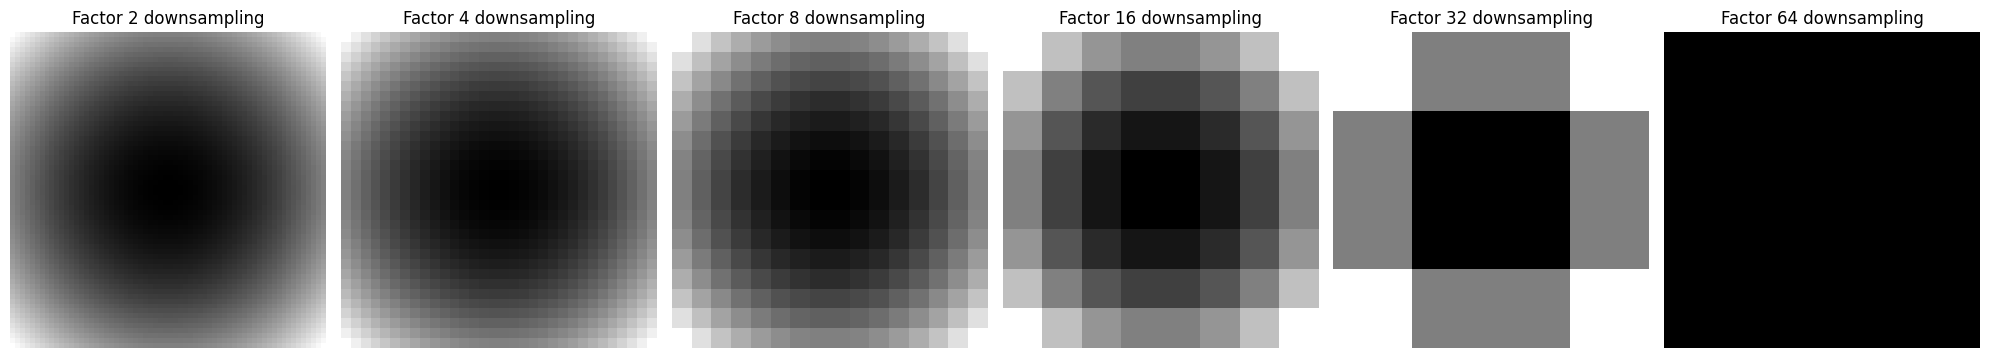

In [ ]:
circle_img = circle_image(
        np.linspace(-1, 1, num=128), np.linspace(-1, 1, num=128)
    )

factors = np.array([2, 4, 8, 16, 32, 64])

figure, ax = plt.subplots(1, len(factors), figsize=(20, 6))

for i, N in enumerate(factors):
    image = # TODO: downsample the image using downscale_local_mean
    ax[i].imshow(image, cmap="gray")
    ax[i].set_title(f"Factor {N} downsampling")
    ax[i].axis("off")
plt.tight_layout()
plt.show()

Now let's practice with real RGB image.

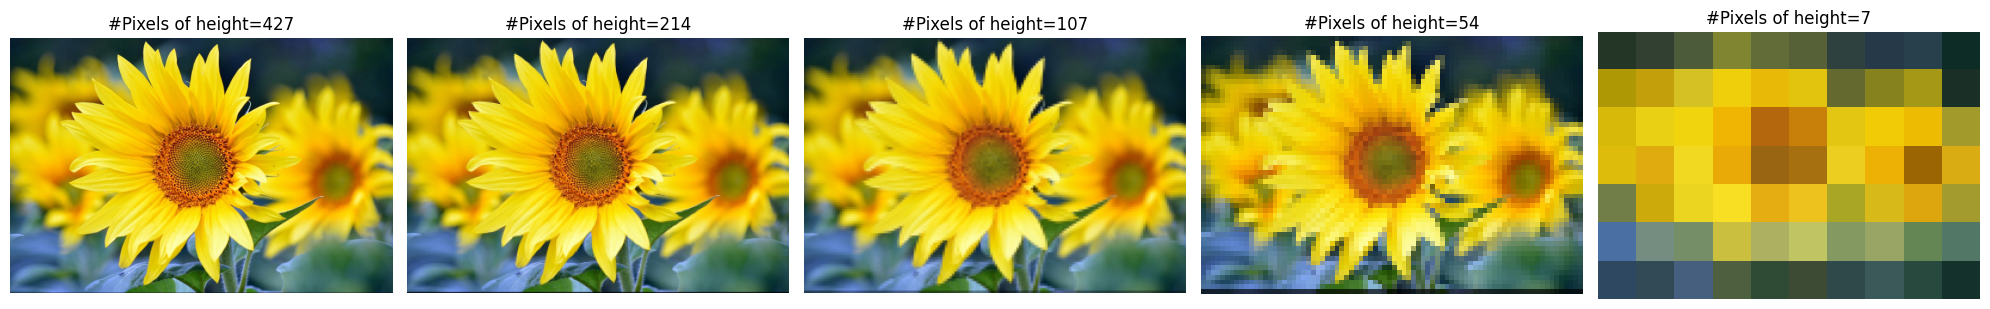

In [ ]:
factors = np.array([2, 4, 8, 16, 128])

img_color_cv = cv2.imread(ROOT / "sunflower.jpg")
img_color_cv = cv2.cvtColor(img_color_cv, cv2.COLOR_BGR2RGB)
sunflower = np.array(img_color_cv)

figure, ax = plt.subplots(1, len(factors), figsize=(20, 6))

for i, N in enumerate(factors):
    image = # TODO: downsample the image using downscale_local_mean
    ax[i].imshow(image)
    ax[i].set_title(f"#Pixels of height={image.shape[0]}")
    ax[i].axis("off")
plt.tight_layout()
plt.show()

## Quantization
Next is image quantization, discretizing intensity values of an analog image. 

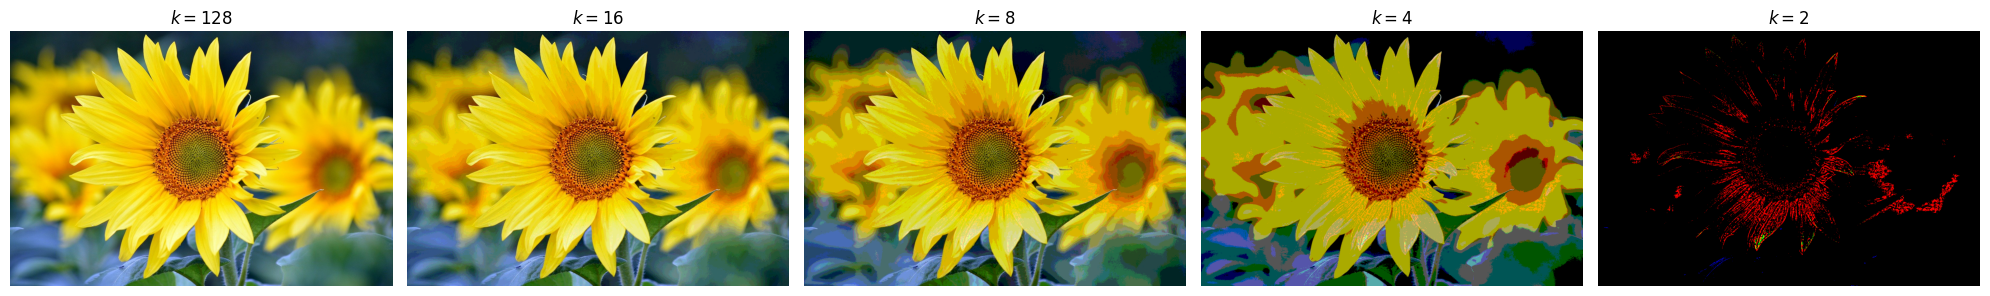

In [ ]:
factors = np.array([128, 16, 8, 4, 2])

figure, ax = plt.subplots(1, len(factors), figsize=(20, 6))

for i, k in enumerate(factors):
    image = # TODO: quantize the image
    ax[i].imshow(image)
    ax[i].axis("off")
    ax[i].set_title(f"$k = {k}$")
plt.tight_layout()
plt.show()

## Exercises

**Exercise 1.** Load moon (`moon.jpg`) image (in gray scale)

**Exercise 2.** Apply gamma transform


**Exercise 3.** Apply histogram equalization


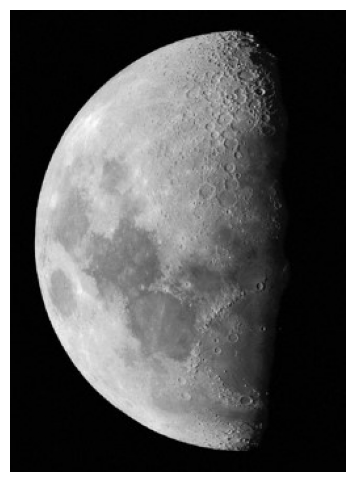

In [ ]:
# Exercise 1.
img_moon_cv = # TODO: load moon image as grayscale
img_moon = np.array(img_moon_cv)
img_moon = (
    (img_moon - np.min(img_moon)) / (np.max(img_moon) - np.min(img_moon)) * 255
)  # Normalize to [0, 255]

# TODO: plot moon image


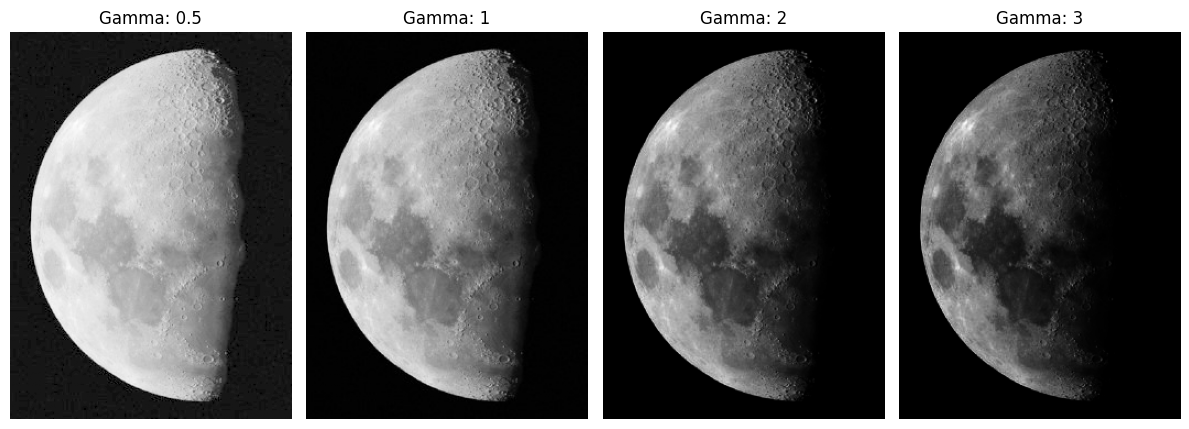

In [ ]:
# Exercise 2.
def gamma_transform(image, gamma):
    # TODO: Normalize the image to [0, 1] range
    
    # TODO: Apply gamma correction
    
    return 

gamma_values = [0.5, 1, 2, 3]
plt.figure(figsize=(12, 6))
for gamma in gamma_values:
    transformed_image = gamma_transform(img_moon, gamma)
    plt.subplot(1, len(gamma_values), gamma_values.index(gamma) + 1)
    plt.imshow(transformed_image, cmap="gray", vmin=0, vmax=255)
    plt.title(f"Gamma: {gamma}")
    plt.axis("off")
plt.tight_layout()
plt.show()

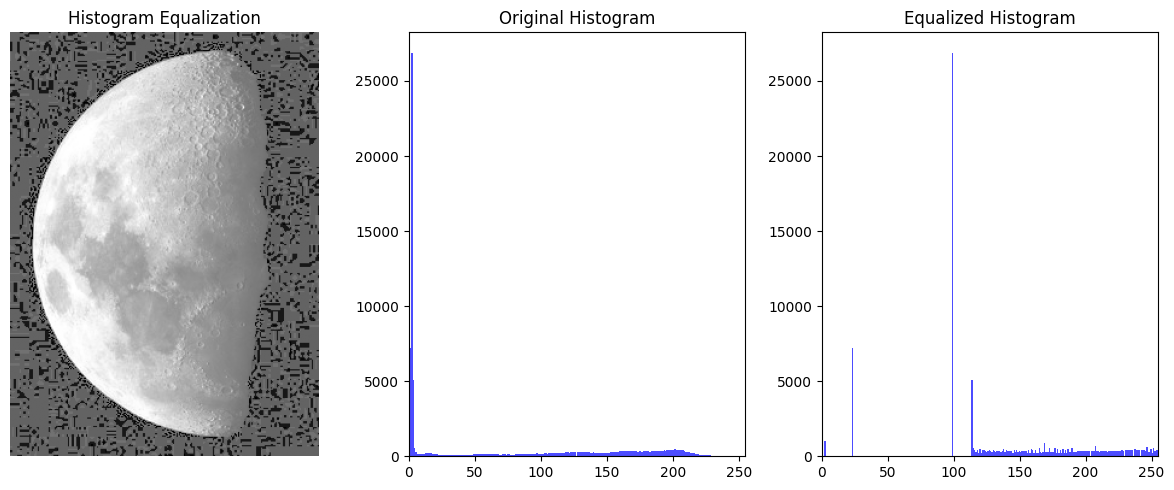

In [ ]:
# Exercise 3.
def histogram_equalization(image):
    # TODO: implement histogram equalization
    return 


equalized_image = histogram_equalization(img_moon)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(equalized_image, cmap="gray", vmin=0, vmax=255)
plt.title("Histogram Equalization")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.hist(img_moon.flatten(), bins=256, range=(0, 255), color="blue", alpha=0.7)
plt.title("Original Histogram")
plt.xlim(0, 255)
plt.subplot(1, 3, 3)
plt.hist(equalized_image.flatten(), bins=256, range=(0, 255), color="blue", alpha=0.7)
plt.title("Equalized Histogram")
plt.xlim(0, 255)
plt.tight_layout()
plt.show()